In [1]:
import numpy as np
import pandas as pd
import torch
from matplotlib import pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid
import seaborn as sns
from tqdm import tqdm
from torchvision import transforms
import albumentations as A
from albumentations.pytorch.transforms import ToTensorV2
from skimage import io

In [2]:
from cassava.transforms import get_train_transforms, get_test_transforms
from cassava.utils import *

In [3]:
%matplotlib inline

In [4]:
train = context.catalog.load('train')

2020-12-27 10:26:45,952 - kedro.io.data_catalog - INFO - Loading data from `train` (ImageOneFolderDataSet)...


In [5]:
raw_transforms = A.Compose([
        A.ToFloat(max_value=1.0),
        A.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ToTensorV2(),
])

In [6]:
aug_transforms = get_train_transforms()
aug_transforms

Compose([
  HueSaturationValue(always_apply=False, p=0.5, hue_shift_limit=(-5, 5), sat_shift_limit=(-5, 5), val_shift_limit=(-5, 5)),
  JpegCompression(always_apply=False, p=0.5, quality_lower=95, quality_upper=100),
  ColorJitter(always_apply=False, p=0.5, brightness=[0.8, 1.2], contrast=[0.8, 1.2], saturation=[0.8, 1.2], hue=[-0.2, 0.2]),
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  ShiftScaleRotate(always_apply=False, p=0.5, shift_limit_x=(-0.0625, 0.0625), shift_limit_y=(-0.0625, 0.0625), scale_limit=(-0.09999999999999998, 0.10000000000000009), rotate_limit=(-45, 45), interpolation=1, border_mode=4, value=None, mask_value=None),
  RandomResizedCrop(always_apply=False, p=1.0, height=360, width=360, scale=(0.1, 0.8), ratio=(0.75, 1.3333333333333333), interpolation=1),
  HorizontalFlip(always_apply=False, p=0.5),
  VerticalFlip(always_apply=False, p=0.5),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  C

In [7]:
test_transforms = get_test_transforms()
test_transforms

Compose([
  ToFloat(always_apply=False, p=1.0, max_value=1.0),
  CenterCrop(always_apply=False, p=1.0, height=450, width=450),
  Normalize(always_apply=False, p=1.0, mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225], max_pixel_value=255.0),
  ToTensorV2(always_apply=True, p=1.0, transpose_mask=False),
], p=1.0, bbox_params=None, keypoint_params=None, additional_targets={})

In [8]:
raw_dataset = DatasetFromSubset(torch.utils.data.Subset(train, indices=list(range(len(train)))), transform=raw_transforms)
augmented_dataset = DatasetFromSubset(torch.utils.data.Subset(train, indices=list(range(len(train)))), transform=aug_transforms)
test_aug_dataset = DatasetFromSubset(torch.utils.data.Subset(train, indices=list(range(len(train)))), transform=test_transforms)

In [9]:
unnorm = Unnormalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])

In [10]:
idx = np.random.choice(range(len(train)))
source = train.sources[idx]
source

'train_2020'

3 train_2020


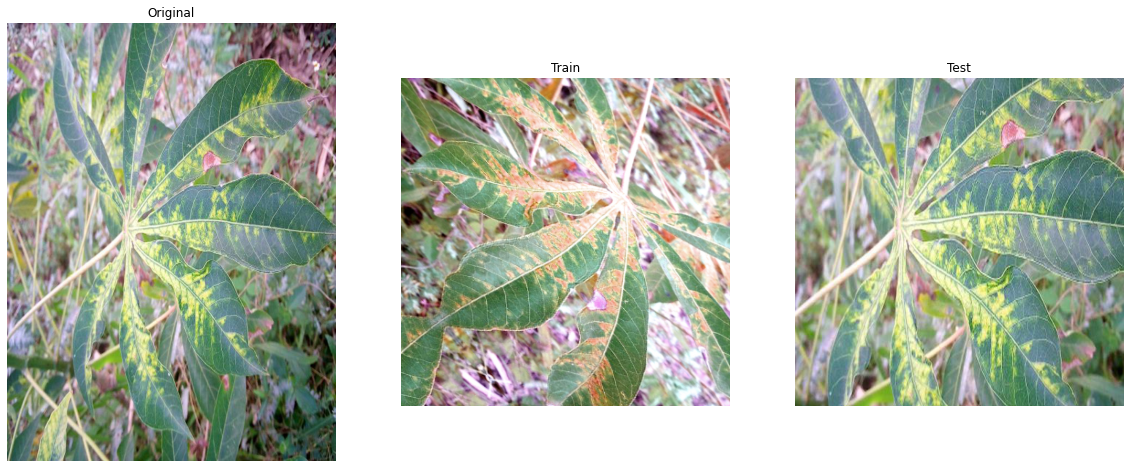

In [31]:
raw_image, label = raw_dataset[idx]
aug_image, _ = augmented_dataset[idx]
test_aug_image, _ = test_aug_dataset[idx]

print(label, source)
plt.figure(figsize=(20, 10))
plt.subplot(1, 3, 1)
plot_image(unnorm(raw_image))
plt.title('Original')
plt.subplot(1, 3, 2)
plot_image(unnorm(aug_image))
plt.title('Train')
plt.subplot(1, 3, 3)
plot_image(unnorm(test_aug_image))
plt.title('Test')
plt.show()

In [12]:
raw_image.shape

torch.Size([3, 600, 800])

In [13]:
raw_image.shape

torch.Size([3, 600, 800])

In [14]:
aug_image.shape, test_aug_image.shape

(torch.Size([3, 360, 360]), torch.Size([3, 450, 450]))